<a href="https://colab.research.google.com/github/aryacodez/DevHack22/blob/main/Glass_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.simplefilter('ignore')

In [114]:
df = pd.read_csv('/content/drive/MyDrive/Glass-Dataset.csv')

Dataset Name: **Glass Identification Data Set**<br>
Dataset Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)<br>
     -- 1 building_windows_float_processed<br>
     -- 2 building_windows_non_float_processed<br>
     -- 3 vehicle_windows_float_processed<br>
     -- 4 vehicle_windows_non_float_processed (none in this database)<br>
     -- 5 containers<br>
     -- 6 tableware<br>
     -- 7 headlamps<br>

     
**Dataset**<br>
The dataset for this project is taken from the UCI dataset website. Here is the link for the dataset, https://archive.ics.uci.edu/ml/datasets/glass+identification<br>

**Goal of the Project**<br>
To Develop a machine learning model that predict the type of glass with highest accuracy.

In [115]:
df.head()

,No,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#**Data Preprocessing**

In [116]:
df.shape

(214, 11)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   AI      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [118]:
df.drop('No',axis=1,inplace=True)

In [119]:
df.isna().sum()

RI      0
Na      0
Mg      0
AI      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
AI,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [121]:
df.rename(columns={'RI':'Refractive Index(RI)','Na':'Sodium(Na)','Mg':'Magnesium(Mg)','Al':'Aluminium(Al)','Si':'Silicon(Si)','K':'Potassium(K)','Ca':'Calcium(Ca)','Ba':'Barium(Ba)','Fe':'Iron(Fe)'},inplace=True)

In [122]:
df.rename(columns={'AI':'Aluminium(Al)'},inplace=True)

In [123]:
df.head()

,Refractive Index(RI),Sodium(Na),Magnesium(Mg),Aluminium(Al),Silicon(Si),Potassium(K),Calcium(Ca),Barium(Ba),Iron(Fe),Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [124]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [125]:
df.skew()

Refractive Index(RI)    1.625431
Sodium(Na)              0.454181
Magnesium(Mg)          -1.152559
Aluminium(Al)           0.907290
Silicon(Si)            -0.730447
Potassium(K)            6.551648
Calcium(Ca)             2.047054
Barium(Ba)              3.416425
Iron(Fe)                1.754327
Type                    1.114915
dtype: float64

#**Exploratory Data Analysis**

Text(0.5, 1.0, 'Different Types of Glasses')

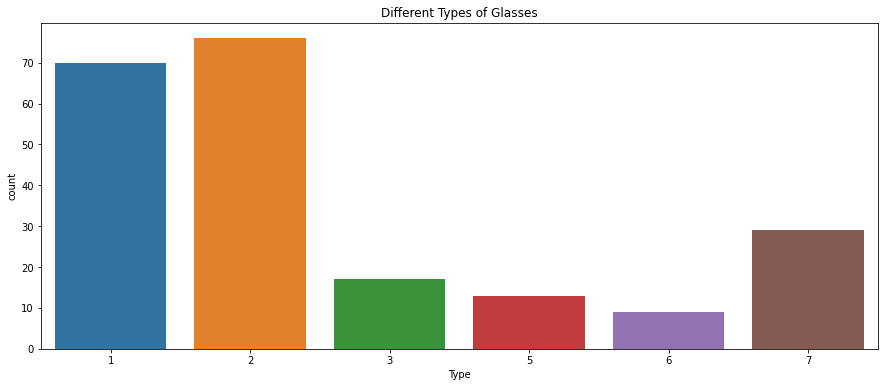

In [126]:
plt.figure(figsize=(15,6))
sns.countplot(x='Type',data=df)
plt.title('Different Types of Glasses')

**Let's check correlation of each variable with Refractive Index**

Pearson Coeff.:  -0.19188537903890265


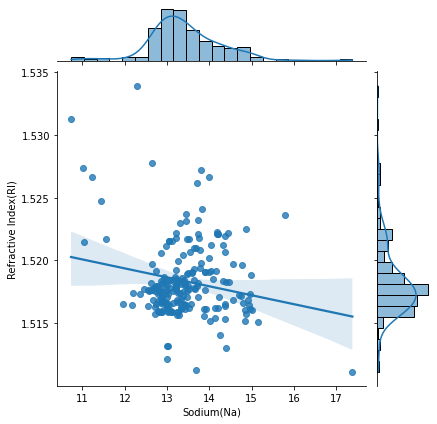

In [127]:
sns.jointplot(y='Refractive Index(RI)',x='Sodium(Na)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Sodium(Na)'])[0])

Pearson Coeff.:  -0.12227403932819372


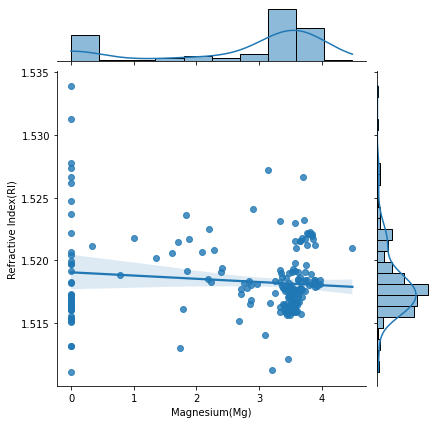

In [128]:
sns.jointplot(y='Refractive Index(RI)',x='Magnesium(Mg)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Magnesium(Mg)'])[0])

Pearson Coeff.:  -0.4073260340813923


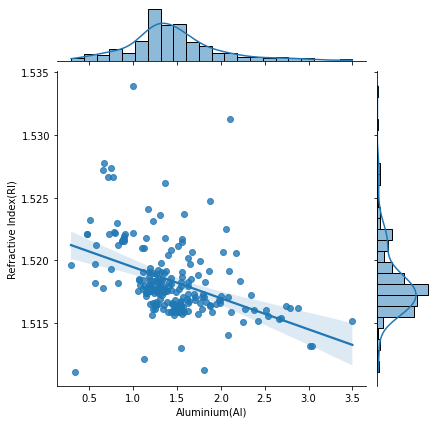

In [129]:
sns.jointplot(y='Refractive Index(RI)',x='Aluminium(Al)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Aluminium(Al)'])[0])

Pearson Coeff.:  -0.5420521997085234


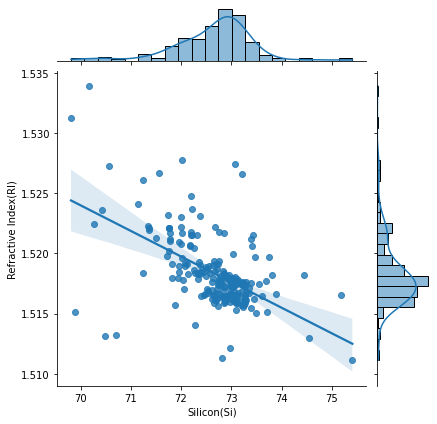

In [130]:
sns.jointplot(y='Refractive Index(RI)',x='Silicon(Si)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Silicon(Si)'])[0])

Pearson Coeff.:  -0.2898327111439612


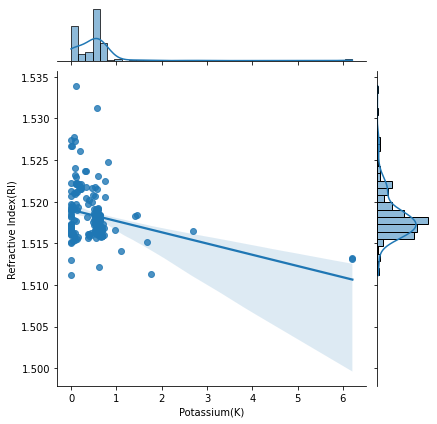

In [131]:
sns.jointplot(y='Refractive Index(RI)',x='Potassium(K)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Potassium(K)'])[0])

Pearson Coeff.:  0.810402696340087


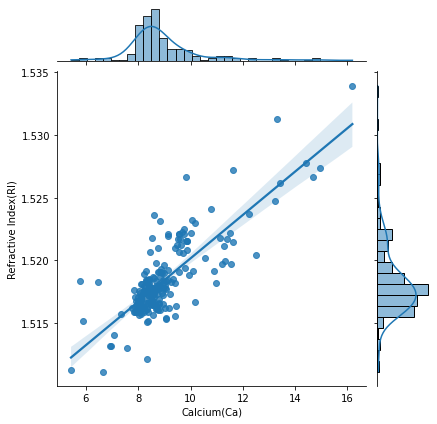

In [132]:
sns.jointplot(y='Refractive Index(RI)',x='Calcium(Ca)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Calcium(Ca)'])[0])

Pearson Coeff.:  -0.00038601891220846926


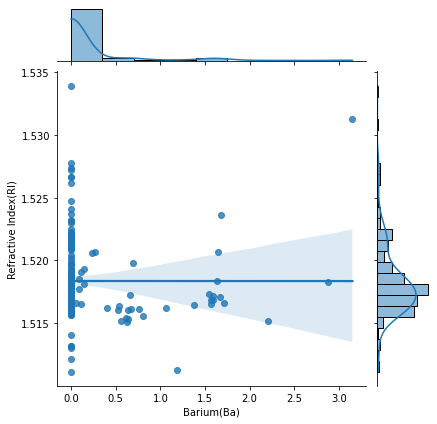

In [133]:
sns.jointplot(y='Refractive Index(RI)',x='Barium(Ba)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Barium(Ba)'])[0])

Pearson Coeff.:  0.14300960927754575


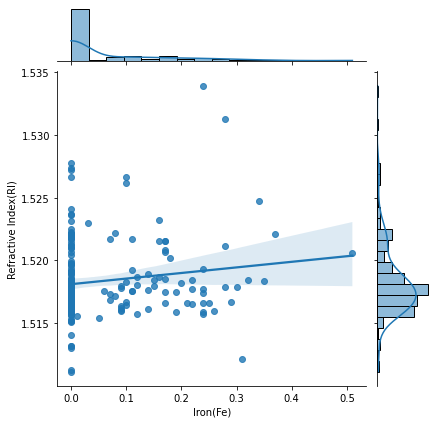

In [134]:
sns.jointplot(y='Refractive Index(RI)',x='Iron(Fe)',data=df,kind='reg')
print('Pearson Coeff.: ',stats.pearsonr(df['Refractive Index(RI)'],df['Iron(Fe)'])[0])

**Let's See the Skewness of Columns**

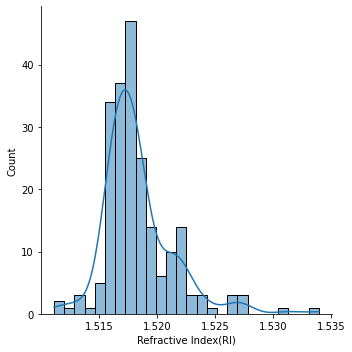

In [135]:
sns.displot(x='Refractive Index(RI)',data=df,kde=True)

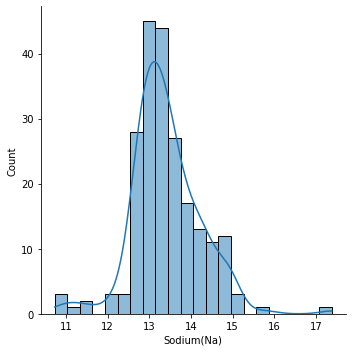

In [136]:
sns.displot(x='Sodium(Na)',data=df,kde=True)

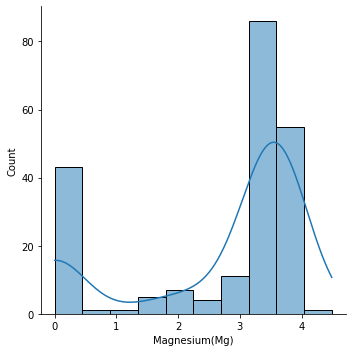

In [137]:
sns.displot(x='Magnesium(Mg)',data=df,kde=True)

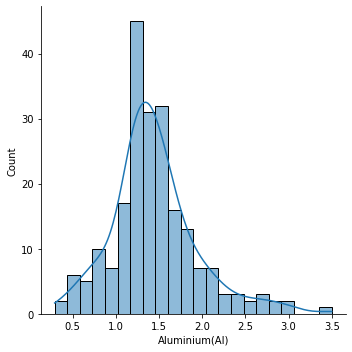

In [138]:
sns.displot(x='Aluminium(Al)',data=df,kde=True)

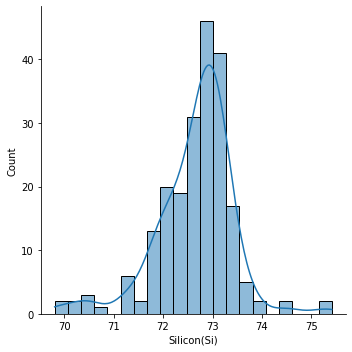

In [139]:
sns.displot(x='Silicon(Si)',data=df,kde=True)

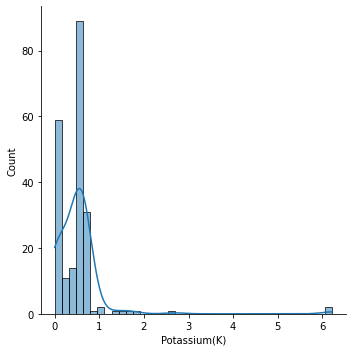

In [140]:
sns.displot(x='Potassium(K)',data=df,kde=True)

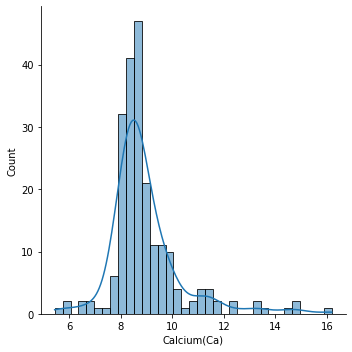

In [141]:
sns.displot(x='Calcium(Ca)',data=df,kde=True)

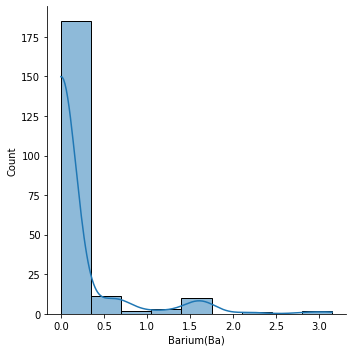

In [142]:
sns.displot(x='Barium(Ba)',data=df,kde=True)

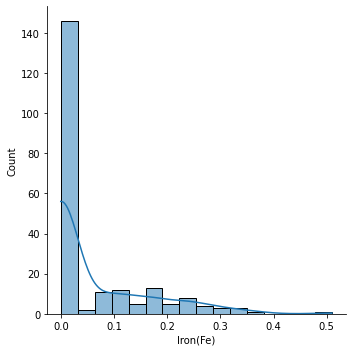

In [143]:
sns.displot(x='Iron(Fe)',data=df,kde=True)

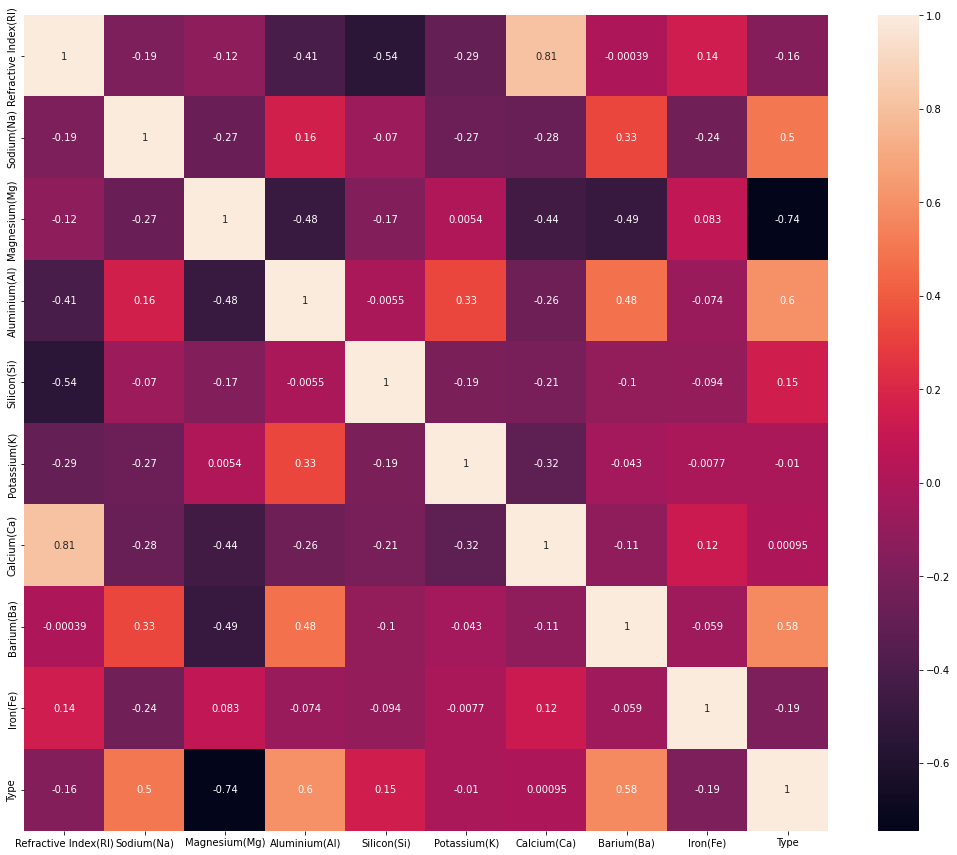

In [144]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

In [145]:
df.corr()['Type']

Refractive Index(RI)   -0.164237
Sodium(Na)              0.502898
Magnesium(Mg)          -0.744993
Aluminium(Al)           0.598829
Silicon(Si)             0.151565
Potassium(K)           -0.010054
Calcium(Ca)             0.000952
Barium(Ba)              0.575161
Iron(Fe)               -0.188278
Type                    1.000000
Name: Type, dtype: float64

**Checking Outliers in data using Boxenplot**

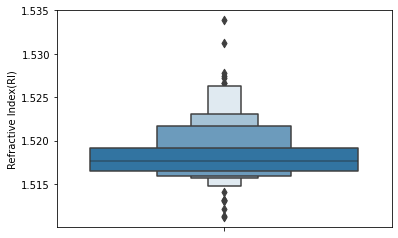

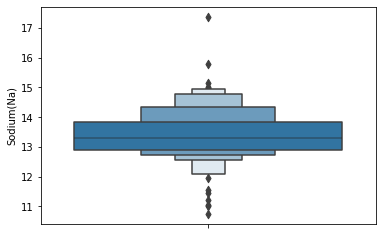

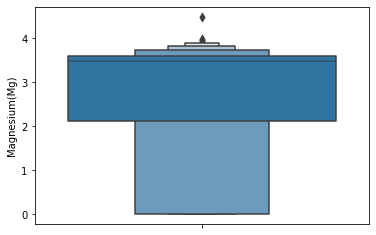

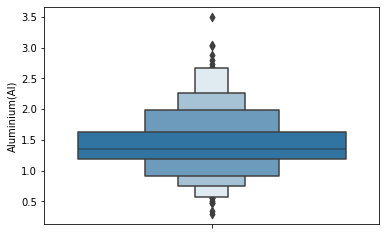

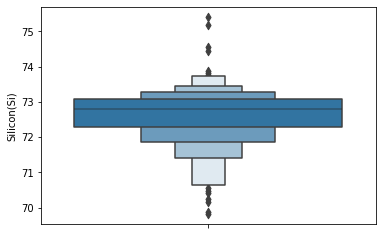

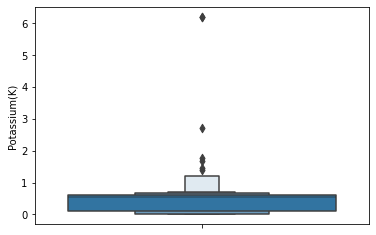

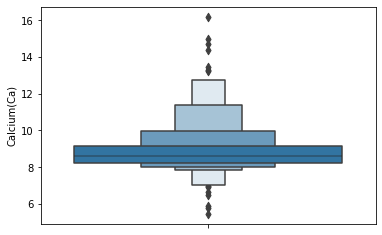

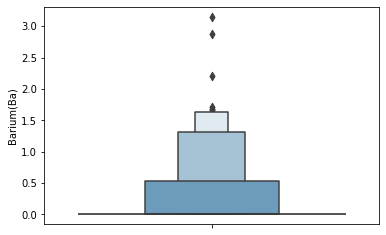

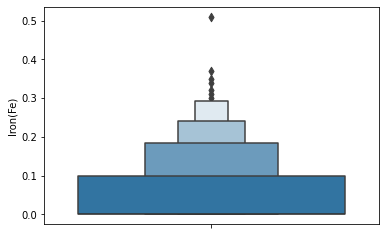

In [146]:
col = ['Refractive Index(RI)', 'Sodium(Na)', 'Magnesium(Mg)', 'Aluminium(Al)',
       'Silicon(Si)', 'Potassium(K)', 'Calcium(Ca)', 'Barium(Ba)', 'Iron(Fe)']

for i in range(0,9):
  sns.boxenplot(y=col[i],data=df)
  plt.show()

**Checking for Relation of Each Column with Type**

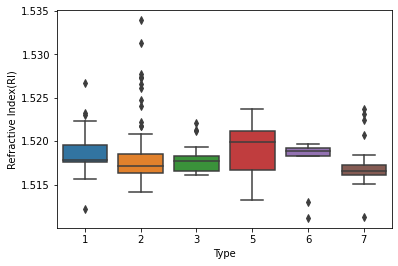

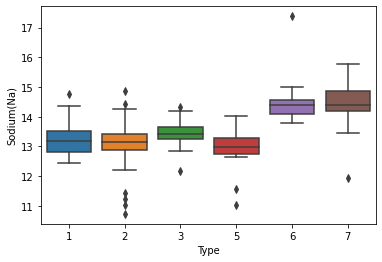

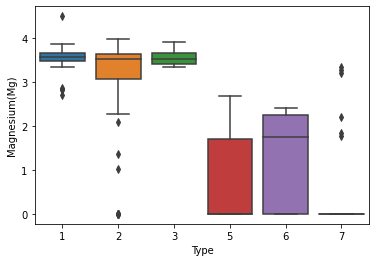

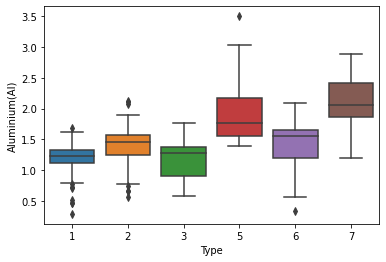

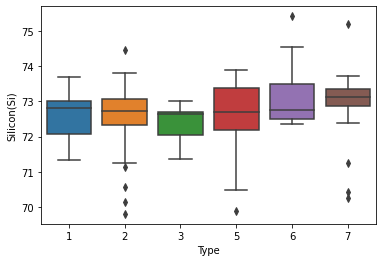

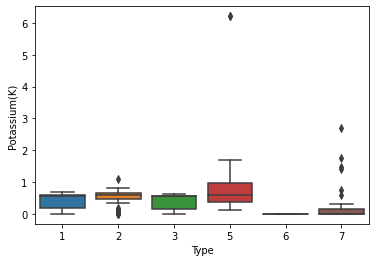

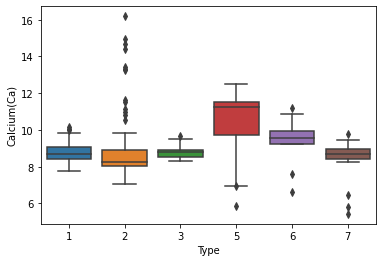

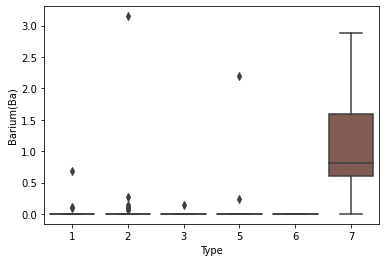

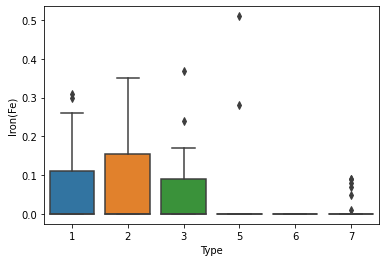

In [147]:
col = ['Refractive Index(RI)', 'Sodium(Na)', 'Magnesium(Mg)', 'Aluminium(Al)',
       'Silicon(Si)', 'Potassium(K)', 'Calcium(Ca)', 'Barium(Ba)', 'Iron(Fe)']

for i in range(0,9):
  sns.boxplot(y=col[i],x='Type',data=df)
  plt.show()

#**Model Building**

In [148]:
X=df.drop(['Type'],axis=1)
y=df['Type']

In [149]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [150]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=25)

In [151]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


**Logistic Regression**

In [152]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=800)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=800)

In [153]:
pred_test = lr.predict(x_test)

In [154]:
lr_acc = accuracy_score(y_test,pred_test)
print('Accuracy Score of Test Data: ',lr_acc)

Accuracy Score of Test Data:  0.6615384615384615


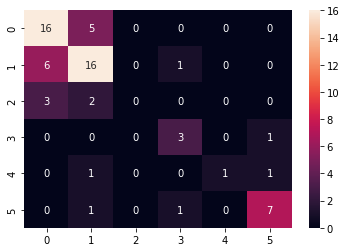

In [155]:
cnf = confusion_matrix(y_test,pred_test)
sns.heatmap(cnf,annot=True)

In [156]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.64      0.76      0.70        21
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         5
           5       0.60      0.75      0.67         4
           6       1.00      0.33      0.50         3
           7       0.78      0.78      0.78         9

    accuracy                           0.66        65
   macro avg       0.61      0.55      0.55        65
weighted avg       0.62      0.66      0.63        65



**Random Forest Classifier**

In [157]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=700,criterion='entropy',n_jobs=-1)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=700, n_jobs=-1)

In [158]:
pred_test_r = rfc.predict(x_test)

In [159]:
rfc_acc = accuracy_score(y_test,pred_test_r)
print('Accuracy Score of Test Data: ',rfc_acc)

Accuracy Score of Test Data:  0.8


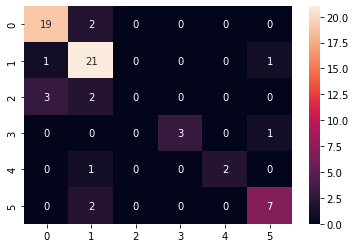

In [160]:
cnf = confusion_matrix(y_test,pred_test_r)
sns.heatmap(cnf,annot=True)

In [161]:
print(classification_report(y_test,pred_test_r))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.75      0.91      0.82        23
           3       0.00      0.00      0.00         5
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.78      0.78      0.78         9

    accuracy                           0.80        65
   macro avg       0.73      0.67      0.69        65
weighted avg       0.75      0.80      0.77        65



**K-Nearest Neighbors**

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [163]:
pred_test_k = knn.predict(x_test)

In [164]:
knn_acc = accuracy_score(y_test,pred_test_k)
print('Accuracy Score of Test Data: ',knn_acc)

Accuracy Score of Test Data:  0.7384615384615385


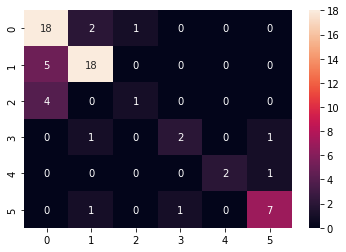

In [165]:
cnf = confusion_matrix(y_test,pred_test_k)
sns.heatmap(cnf,annot=True)

In [166]:
print(classification_report(y_test,pred_test_k))

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        21
           2       0.82      0.78      0.80        23
           3       0.50      0.20      0.29         5
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       0.78      0.78      0.78         9

    accuracy                           0.74        65
   macro avg       0.74      0.63      0.66        65
weighted avg       0.74      0.74      0.73        65



**MLP Classifier**

In [167]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(learning_rate_init=0.01,learning_rate='adaptive',max_iter=1000)
mlp.fit(x_train,y_train)

MLPClassifier(learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000)

In [168]:
pred_test_m = mlp.predict(x_test)

In [169]:
mlp_acc = accuracy_score(y_test,pred_test_m)
print('Accuracy Score of Test Data: ',mlp_acc)

Accuracy Score of Test Data:  0.6615384615384615


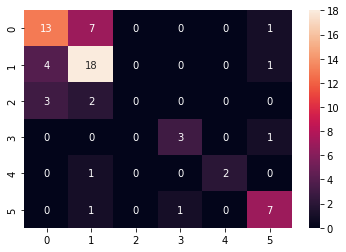

In [170]:
cnf = confusion_matrix(y_test,pred_test_m)
sns.heatmap(cnf,annot=True)

In [171]:
print(classification_report(y_test,pred_test_m))

              precision    recall  f1-score   support

           1       0.65      0.62      0.63        21
           2       0.62      0.78      0.69        23
           3       0.00      0.00      0.00         5
           5       0.75      0.75      0.75         4
           6       1.00      0.67      0.80         3
           7       0.70      0.78      0.74         9

    accuracy                           0.66        65
   macro avg       0.62      0.60      0.60        65
weighted avg       0.62      0.66      0.63        65



**XGBoost Classifier**

In [172]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators =1000,booster='dart',n_jobs=-1)
xgb.fit(x_train,y_train)

XGBClassifier(booster='dart', n_estimators=1000, n_jobs=-1,
              objective='multi:softprob')

In [173]:
pred_test_x = xgb.predict(x_test)

In [174]:
xgb_acc = accuracy_score(y_test,pred_test_x)
print('Accuracy Score of Test Data: ',xgb_acc)

Accuracy Score of Test Data:  0.8153846153846154


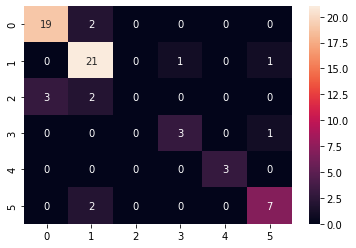

In [175]:
cnf = confusion_matrix(y_test,pred_test_x)
sns.heatmap(cnf,annot=True)

In [176]:
print(classification_report(y_test,pred_test_x))

              precision    recall  f1-score   support

           1       0.86      0.90      0.88        21
           2       0.78      0.91      0.84        23
           3       0.00      0.00      0.00         5
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       0.78      0.78      0.78         9

    accuracy                           0.82        65
   macro avg       0.69      0.72      0.71        65
weighted avg       0.75      0.82      0.78        65



**Model Overview**

In [177]:
model_df = pd.DataFrame({
    'Models' : ['Logistic Regression', 'KNN','XGBoost','MLP','Random Forest'],
    'Accuracy Score' : [lr_acc,knn_acc,xgb_acc,mlp_acc,rfc_acc]   
})

In [178]:
model_df.sort_values(by = 'Accuracy Score')

,Models,Accuracy Score
0,Logistic Regression,0.661538
3,MLP,0.661538
1,KNN,0.738462
4,Random Forest,0.800000
2,XGBoost,0.815385


**We Find that the model that performed best on the test data is the XGBoost Classifier though Random Forest Classifier almost has the same value as XGBoost Classifier.**

**Store the Model of XGBoost Classifier**

In [180]:
import pickle
pickle.dump(xgb,open('xgboost_glass_pred.pkl','wb'))

#Checking the model

load = pickle.load(open('xgboost_glass_pred.pkl', 'rb'))
res = load.score(x_test, y_test)
print('Score: ',res)

Score:  0.8153846153846154


**Name: Arya Sarkar**<br>
**Contributed to: DevHack**<br>
**Year: 2022**